In [1]:
import pandas as pds
import os
import numpy as np
import pickle

columns = ["Source", "Word", "Meaning", "Usage", "Correct", "Incorrect", "Score"]

# Enter GRE words into the `Pandas.DataFrame`
* Checks if entry has already been made for the same word
* To exit the loop give any input of `len(word) < 3`
* It is saved after every entry

In [ ]:
import pandas as pds
import os
import numpy as np
import pickle

columns = ["Source", "Word", "Meaning", 
           "Usage", "Correct", "Incorrect", "Score"]

def numberOfEntries(df, source):
    cond = (df["Source"]==source)
    return len(df["Word"][cond])

default = "mag_a2"
source = input("Enter the source: ").lower()
if len(source)==0:
    source = default.lower()
    
print("Source = %s\n\n"%source)

if os.path.exists("./dataFrame.p"):
    df = pickle.load(open("./dataFrame.p", "rb"))
else:
    df = pds.DataFrame(columns=columns)

while(True):
    entry = {"Source":source,
            "Correct":0,
            "Incorrect":0,
            "Score":-2.0}
    for col in ["Word", "Meaning", "Usage"]:
        entry[col] = input("Enter the %s: "%col).lower()
        if len(entry[col])<3:
            entry = {"Source":"NULL"}
            break;
    if entry["Source"] != "NULL":
        cond = (df["Word"] == entry["Word"])
        if cond.any():
            index = df[cond].index[0]
            row = df.iloc[index]
            print("\nWord %s exists from %s\n\t%s = %s\n\tEx: %s\n"%(row["Word"], row["Source"], 
                                                               row["Word"], row["Meaning"], 
                                                               row["Usage"]))
            cmd = input("Do you wish to replace? Y/N ").lower()
            if cmd=='y':
                df.at[index, "Meaning"] = entry["Meaning"]
                df.at[index, "Usage"] = entry["Usage"]
                print("Modification for %s is done"%(entry["Word"]))
                pickle.dump(df, open("./dataFrame.p", "wb"))
        else:
            df = df.append(entry, ignore_index=True, )
            pickle.dump(df, open("./dataFrame.p", "wb"))
            print("Entry of '%s' made\nCurrent entry count:%d\n"%(entry["Word"], numberOfEntries(df, source)))
    else:
        print("\nEnding the entry!".upper())
        break

print("\nWord Count in %s: %d / %d"%(source, numberOfEntries(df, source), len(df)-2))

Enter the source: 
Source = mag_a2


Enter the Word: arch
Enter the Meaning: to be deliberately teasing
Enter the Usage: The baroness was arch, making playful asides to the townspeople; yet because they couldn't pick up on her dry humor, they thought her supercilious
Entry of 'arch' made
Current entry count:1

Enter the Word: malapropism
Enter the Meaning: noun. the confusion of a word with another word that sounds similar
Enter the Usage: Whenever I looked glum, my mother would offer to share "an amusing antidote" with me—an endearing malapropism of "anecdote" that never failed to cheer me up
Entry of 'malapropism' made
Current entry count:2



# Dictionary implementation
* Paste this cell into a terminal of the same directory and go nuts!
* Given a word, its meaning and other details will be given

In [114]:
import pandas as pds
import os
import numpy as np
import pickle

columns = ["Source", "Word", "Meaning", "Usage", "Correct", "Incorrect", "Score"]

while(True):
    if os.path.exists("./dataFrame.p"):
        df = pickle.load(open("./dataFrame.p", "rb"))
    else:
        df = pds.DataFrame(columns=columns)
    word = input("Enter the word: ").lower()
    if word=="clc":
        os.system("clear")
        continue
    if len(word)<3:
        print("\nDictionary closed!".upper())
        break
    cond = (df["Word"] == word)
    if cond.any():
        index = df[cond].index[0]
        row = df.iloc[index]
        mean = row["Meaning"]
        mean = mean.replace("2" , "\n2")
        usage = row["Usage"]
        usage = usage.replace("2", "\n2")
        print("\nSource : %s : %.2f%%\n%s = %s\n\nEx: %s\n"%(row["Source"], 
                                                            row["Score"]*100.0,
                                                            row["Word"], 
                                                            mean, 
                                                            usage))
    else:
        print("Word '%s' not found in database.\nPlease check spelling or Enter the word in entry section\n"%word)

Enter the word: clemency

Source : MAG_B6 : 66.7%
clemency = leniency or compassion shown towards offenders by a person or agency charged with administering justice

Ex: in the final moments of the trial, during his closing speech, phillips was nearly begging the judge for clemency.

Enter the word: 

DICTIONARY CLOSED!


# Print the words into a file

In [22]:
import pandas as pds
import os
import numpy as np
import pickle

columns = ["Source", "Word", "Meaning", "Usage", "Correct", "Incorrect", "Score"]
df = pickle.load(open("./dataFrame.p", "rb"))
cond = (df["Score"]<=0.1)#| ((df["Score"]>0.5) & (df["Correct"]==1))
df = df[cond]
print(len(df))
sorted_df = df.sort_values(by="Word")

f = open("Words_zero.txt", "w")
for i,(word,meaning,usage) in enumerate(zip(sorted_df["Word"], 
                                       sorted_df["Meaning"], 
                                       sorted_df["Usage"])):
    meaning = meaning.replace("2", "\n2")
    usage = usage.replace("2", "\n2")
    f.write("%d. %s:\n%s\nEx:  %s\n\n"%(i+1, word, meaning, usage))
#     f.write("%d,%s\n"%(i+1, word))
f.close()

284


# Revise Script V 1.0

In [1]:
import pandas as pds
import os
import numpy as np
import pickle

# cond = df["Source"] == "princeton"
df = pickle.load(open("./dataFrame.p", "rb"))
temp_df = df.sample(frac=1).reset_index(drop=True)
words = []
scores = {}

for (word, score, src, c, ic) in zip(temp_df["Word"], temp_df["Score"], 
                              temp_df["Source"], temp_df["Correct"], 
                              temp_df["Incorrect"]):
    if (score<0.61):
        words.append(word)
        scores[word] = score

def key_scores(word):
    global scores
    return scores[word]

sorted_words = sorted(words, key=key_scores)
length = len(sorted_words)
fin_score = 0

for i,word in enumerate(sorted_words):
    cond = (df["Word"] == word)
    index = df[cond].index[0]
    row = df.iloc[index]
    mean = row["Meaning"]
    mean = mean.replace("2" , "\n2")
    usage = row["Usage"]
    usage = usage.replace("2", "\n2")
    s = row["Score"]
    if s == -2:
        string = "New"
    else:
        string = str(int(s*100.))
    
    temp = input("%d/%d) %s => Score: %s%%"%(i+1, length, word.upper(), string))
    print("\nSource : %s\n%s = %s\n\nEx: %s\n"%(row["Source"], 
                                                row["Word"].upper(), 
                                                mean, 
                                                usage))
    correct = input("Remember? :: Y/N ").lower()
    if len(correct) == 0:
        break
     
    if (correct[0] == "y"):
        df.at[index, "Correct"] += 1
        fin_score += 1
    else:
        df.at[index, "Incorrect"] += 1
    os.system("clear")
    c = df.at[index, "Correct"]
    ic = df.at[index, "Incorrect"]
    
    df.at[index, "Score"] = float(c)/float(c+ic)
    pickle.dump(df, open("./dataFrame.p", "wb"))
    

print("\nEnding revision %d/%d!"%(fin_score, i))

1/131) ZEALOUS => Score: New%

Source : princeton
ZEALOUS = avid; marked by active interest and enthusiasm

Ex: the council was extremely zealous in the application of the regulations

Remember? :: Y/N 

Ending revision 0/0!


# Revise Script V 1.1

In [171]:
# import pandas as pds
# import os
# import numpy as np
# import pickle

# # cond = df["Source"] == "princeton"
# df = pickle.load(open("./dataFrame.p", "rb"))
# temp_df = df.sample(frac=1).reset_index(drop=True)
# words = []
# scores = {}

# for (word, score, src, c, ic) in zip(temp_df["Word"], temp_df["Score"], 
#                               temp_df["Source"], temp_df["Correct"], 
#                               temp_df["Incorrect"]):
#     if (score<0.61):
#         words.append(word)
#         scores[word] = score

# def key_scores(word):
#     global scores
#     return scores[word]

# sorted_words = sorted(words, key=key_scores)
# length = len(sorted_words)
# fin_score = 0

# groupSize = input("Group size for revision: ")
# if len(groupSize)<2:
#     groupSize = 30
# else:
#     groupSize = int(groupSize)
    
# groupCount = int(np.ceil(length/groupSize))


# for groupIndex in range(groupCount):
#     currSet = sorted_words[groupIndex*groupSize:(groupIndex+1)*groupSize]
#     for sweepIndex in range(2):
#         np.random.shuffle(currSet)
#         x = 0
#         for i, word in enumerate(currSet):
#             cond = (df["Word"] == word)
#             index = df[cond].index[0]
#             row = df.iloc[index]
#             mean = row["Meaning"]
#             mean = mean.replace("2" , "\n2")
#             usage = row["Usage"]
#             usage = usage.replace("2", "\n2")
#             s = row["Score"]
#             if s == -2:
#                 string = "New"
#             else:
#                 string = str(int(s*100.))

#             temp = input("G%d/%d: R%d/2: W%d/%d) %s => Score: %s%%"%(groupIndex+1, groupCount, sweepIndex+1,
#                                                          i+1, groupSize, word.upper(), string))
#             print("\nSource : %s\n%s = %s\n\nEx: %s\n"%(row["Source"], 
#                                                         row["Word"].upper(), 
#                                                         mean, 
#                                                         usage))
#             correct = input("Remember? :: Y/N ").lower()
#             if len(correct) == 0:
#                 break

#             if (correct[0] == "y"):
#                 df.at[index, "Correct"] += 1
#                 x += 1
#                 fin_score += 1
#             else:
#                 df.at[index, "Incorrect"] += (1+sweepIndex)
#             os.system("clear")
#             c = df.at[index, "Correct"]
#             ic = df.at[index, "Incorrect"]

#             df.at[index, "Score"] = float(c)/float(c+ic)
#             pickle.dump(df, open("./dataFrame.p", "wb"))
#         print("Score: G%d/%d :: %d/%d"%(groupIndex+1, groupCount, x, groupSize))

# print("\nEnding revision %d/%d!"%(fin_score, i))

In [28]:
np.ceil(9/5)

2.0

In [36]:
x = [1,2,3,4,5,6,7,8,9,0]

In [30]:
np.random.shuffle(x)

In [31]:
x

[7, 3, 6, 1, 2, 5, 4]

In [37]:
a = x[0:5]
np.random.shuffle(a)

In [38]:
x

[1, 2, 3, 4, 5, 6, 7, 8, 9, 0]

In [39]:
a

[5, 2, 4, 3, 1]

In [170]:
df = pickle.load(open("./dataFrame.p", "rb"))
len(df[df["Source"].str.contains('mag_a7')])

20

In [155]:
df = pickle.load(open("./dataFrame.p", "rb"))
# df["Meaning"][df["Meaning"].str.contains("negative")]
len(df[( (df["Correct"]+df["Incorrect"]) == 2)])

228

0.00 4
0.10 1
0.11 1
0.12 2
0.14 3
0.17 7
0.22 1
0.25 4
0.29 6
0.33 63
0.40 13
0.43 3
0.50 20
0.60 18
0.67 223
0.75 35
1.00 481


(array([  4.,  14.,  11.,  63.,  16.,  38., 223.,  35.,   0., 481.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

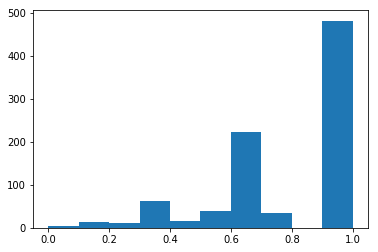

In [163]:
from matplotlib import pyplot as plt

df = pickle.load(open("./dataFrame.p", "rb"))
x = []
for s in sorted(list(set(list(df["Score"].values)))):
    print("%.2f"%s, len(df[df["Score"]==s]))
plt.hist(list(df["Score"].values))